In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\train.csv")

In [3]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df= df.dropna()

In [6]:
df.shape

(18285, 5)

In [7]:
messages = df.copy()

In [8]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [9]:
messages.reset_index(inplace = True)

In [10]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=6000,ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()
Y = messages['label']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [15]:
cv.get_feature_names()

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'aboard',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abu',
 'abus',
 'abus new',
 'abus new york',
 'academ',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accident post',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acid',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acosta',
 'acquit',
 'acquit malheur',
 'acquit malheur wildlif',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'affo

In [16]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [20]:
count_df = pd.DataFrame(X_train,columns = cv.get_feature_names())

In [21]:
count_df.head(5)

,aaron,ab,abandon,abba,abc,abc news,abduct,abe,abedin,abl,...,zika new,zika new york,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [25]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [28]:
classifier.fit(X_train,Y_train)
pred = classifier.predict(X_test)

In [31]:
from sklearn import metrics
import numpy as np
import itertools

In [33]:
score = metrics.accuracy_score(Y_test,pred)
print(score*100)

90.15586546349466


Confusion matrix, without normalization


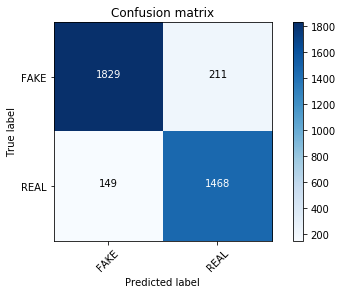

In [36]:
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

# MULTINOMIAL NB WITH HYER PARAMETER

In [44]:
classifier_1 = MultinomialNB(alpha = 0.1)

In [49]:
for i in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=i)
    sub_classifier.fit(X_train,Y_train)
    Y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(Y_test,Y_pred)
    print('Alpha: {}, Score: {}'.format(i,score))
    

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score: 0.8911676237353021
Alpha: 0.1, Score: 0.905386929176921
Alpha: 0.2, Score: 0.9056603773584906
Alpha: 0.30000000000000004, Score: 0.905386929176921
Alpha: 0.4, Score: 0.9045665846322122
Alpha: 0.5, Score: 0.904019688269073
Alpha: 0.6000000000000001, Score: 0.9037462400875034
Alpha: 0.7000000000000001, Score: 0.9034727919059339
Alpha: 0.8, Score: 0.9031993437243643
Alpha: 0.9, Score: 0.9018321028165163


In [50]:
#we can select best alpha value i.e. is here 0.2 and use the same for model creation

# PASSIVE AGGRESSIVE CLASSIFIER

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clif = PassiveAggressiveClassifier()

92.56220946130709
Confusion matrix, without normalization


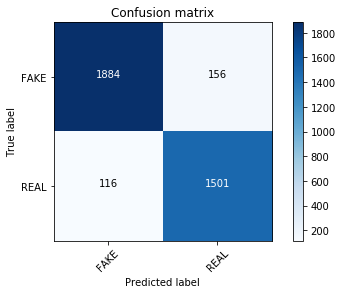

In [43]:
linear_clif.fit(X_train,Y_train)
pred = linear_clif.predict(X_test)
score = metrics.accuracy_score(Y_test,pred)
print(score*100)
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])